In [14]:
# if delta x=0.03, we have
print(0.5*900.*2700.*0.03*0.03/210)

5.207142857142857


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


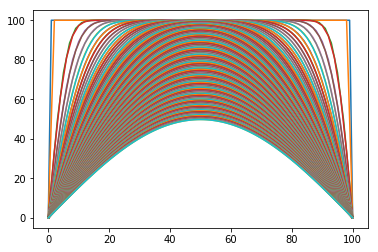

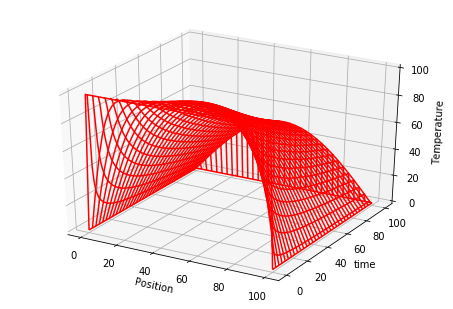

finished


In [16]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# EqHeat.py: solves heat equation via finite differences, 3-D plot
 
from numpy import *
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

Nx = 101;       tend=10000.; Dt=5.2;  Dtout=100.; Nt = 3000;     Dx = 0.03;                                                            
KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
T = zeros((Nx,2),float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
                                    

for ix in range (1, Nx - 1):  T[ix, 0] = 100.0;               # Initial T
T[0,0] = 0.0 ;   T[0,1] = 0.                           # 1st & last T = 0
T[Nx-1,0] = 0. ; T[Nx-1,1] = 0.0                       # Note T[:,0] is the current time and T[:,1] is the next step time.
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                             # constant
m = 1                                                           # counter

toutn=0
t=0.  
while t < tend:                                  
    for ix in range (1, Nx - 1):                       
        T[ix, 1] = T[ix, 0] +  cons*(T[ix+1, 0] + T[ix-1, 0] - 2.*T[ix,0])                                                        
    if t >= toutn*Dtout: 
        p.plot(T)
        Tp[:,toutn] = T[:,1]   
        print(toutn)   
        toutn += 1                        
    for ix in range (1, Nx - 1):  T[ix, 0] = T[ix, 1] 
    t+=Dt

x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y)                       

def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tp)              
fig = p.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
p.show()                               
print("finished")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


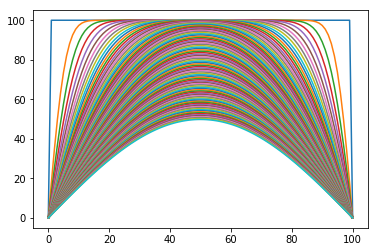

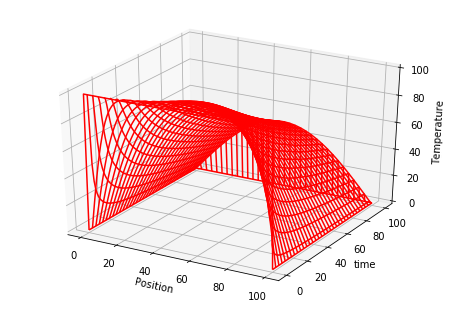

finished


In [18]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# HeatCNTridiag.py:  solution of heat eqtn via CN method	 

import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *;
import numpy;

Nx=101;      tend=10000.; Dt=5.2;  Dtout=100.;     Dx = 0.03;                                                            
KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
T = zeros(Nx,float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
                 

for ix in range (1, Nx - 1):  T[ix] = 100.0;               # Initial T
T[0] = 0.0                     # 1st & last T = 0
T[Nx-1] = 0. 
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                             # constant
m = 1      

n   = 100;   m = 100
Ta  = zeros((Nx),float); Tb =zeros((Nx),float); Tc = zeros((Nx),float)
Td  = zeros((Nx),float); a = zeros((Nx),float); b = zeros((Nx),float)
c   = zeros((Nx),float); d = zeros((Nx),float); x = zeros((Nx),float)


def Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n):     
    Max = n+1
    h = zeros( (Max), float )
    p = zeros( (Max), float )
    for i in range(1,n):
        a[i] = Ta[i]
        b[i] = Tb[i]
        c[i] = Tc[i]
        d[i] = Td[i]
    h[1] = c[1]/d[1]
    p[1] = b[1]/d[1]
    for i in range(1,n):
         h[i] = c[i] / (d[i]-a[i]*h[i-1])
         p[i] = (b[i] - a[i]*p[i-1]) / (d[i]-a[i]*h[i-1])
    x[n] = 0
    for i in range( n - 1, 0,-1 ): x[i] = p[i] - h[i]*x[i+1]


for i in range(1, n+1):  Td[i] = 2. + 2./cons
for i in range(1, n+1):  Ta[i] = -1.0;      Tc[i] = -1.0;     # Off diagonal

toutn=0
t=0.
while t < tend:     
    if t >= toutn*Dtout: 
        p.plot(T)
        Tp[:,toutn] = T[:]   
        print(toutn)   
        toutn += 1  
    for i in range(1,n): Tb[i] = T[i-1] + T[i+1] + (2./cons-2.) * T[i] # write one line of code to calculate Tb finish this
    Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n)            # Solve system
    for i in range(1, n+1):  T[i] = x[i]                                                                                 
    t+=Dt
 
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y)                       

def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tp)              
fig = p.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
p.show()                               
print("finished")

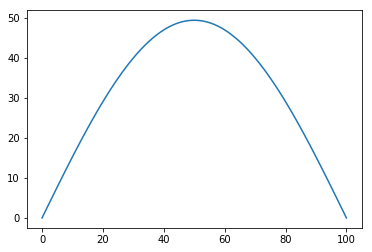

In [19]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# HeatCNTridiag.py:  solution of heat eqtn via CN method	 

import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *;
import numpy;



def Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n):     
    Max = n+1
    h = zeros( (Max), float )
    p = zeros( (Max), float )
    for i in range(1,n):
        a[i] = Ta[i]
        b[i] = Tb[i]
        c[i] = Tc[i]
        d[i] = Td[i]
    h[1] = c[1]/d[1]
    p[1] = b[1]/d[1]
    for i in range(2,n):
         h[i] = c[i] / (d[i]-a[i]*h[i-1])
         p[i] = (b[i] - a[i]*p[i-1]) / (d[i]-a[i]*h[i-1])
    x[n] = 0
    for i in range( n - 1, 0,-1 ): x[i] = p[i] - h[i]*x[i+1]


def CN(Nx, Dt):
    tend=10000.; Dtout=100.; Dx = 3./(Nx-1);                                                            
    KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
    T = zeros(Nx,float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
    xarr = zeros(Nx,float)                                    

    
    for ix in range (1, Nx - 1):  T[ix] = 100.#*sin(pi*ix*Dx/(Dx*(Nx-1)));               # Initial T
    T[0] = 0.0                     # 1st & last T = 0
    T[Nx-1] = 0. 
     
    cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                             # constant
    m = 1      

    n   = Nx-1
    Ta  = zeros((Nx),float); Tb =zeros((Nx),float); Tc = zeros((Nx),float)
    Td  = zeros((Nx),float); a = zeros((Nx),float); b = zeros((Nx),float)
    c   = zeros((Nx),float); d = zeros((Nx),float); x = zeros((Nx),float)

    for i in range(1, n+1):  Td[i] = 2. + 2./cons
    for i in range(1, n+1):  Ta[i] = -1.0;      Tc[i] = -1.0;     # Off diagonal

    t=0.
    while t < tend:     
        for i in range(1,n): Tb[i] = T[i-1] + T[i+1] + (2./cons-2.) * T[i]
        Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n)            # Solve system
        for i in range(1, n+1):  T[i] = x[i]                                                                                 
        t+=Dt
 
    p.plot(T)
    p.show()

CN(101,5.2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


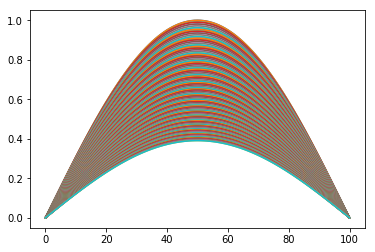

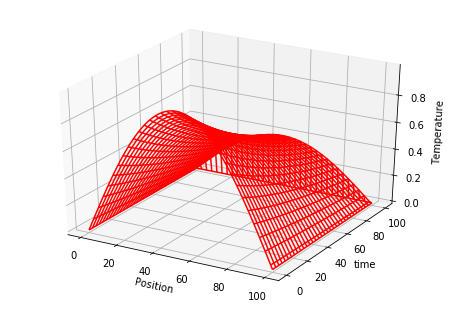

finished


In [20]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# EqHeat.py: solves heat equation via finite differences, 3-D plot
 
from numpy import *
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 


Nx=101;      tend=10000.; Dt=5.;  Dtout=100.; Nt = 3000;     Dx = 0.03;                                                            
KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
T = zeros((Nx,2),float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
xarr = zeros(Nx,float)                                    

for ix in range (0, Nx):  
    xarr[ix]=ix*Dx
    T[ix,0] = sin(pi*ix*Dx/(Dx*(Nx-1)))             # Initial T
     
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                             # constant
m = 1                                                           # counter

toutn=0
t=0.
while t < tend:                                  
    for ix in range (1, Nx - 1):                       
        T[ix, 1] = T[ix, 0] +  cons*(T[ix+1, 0] + T[ix-1, 0] - 2.*T[ix,0])                                                        
    if t >= toutn*Dtout: 
        p.plot(T)
        Tp[:,toutn] = T[:,1]   
        print(toutn)   
        toutn += 1                        
    for ix in range (1, Nx - 1):  T[ix, 0] = T[ix, 1] 
    t+=Dt
        
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y)                       

def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tp)              
fig = p.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
p.show()                               
print("finished")

In [21]:
KAPPA = 210.; SPH = 900.; RHO = 2700.
L=(Nx-1)*Dx
error=max(abs(sin(pi*xarr/L)*exp(-pi*pi*KAPPA*tend/L/L/SPH/RHO)-T[:,0]))
print(error)

5.68322549018e-05


In [22]:

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# EqHeat.py: solves heat equation via finite differences, 3-D plot
 
from numpy import *
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

def FTCS(Nx, Dt):
    tend=10000.; Dtout=100.; Dx = 3./(Nx-1);                                                            
    KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
    T = zeros((Nx,2),float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
    xarr = zeros(Nx,float)                                    

    for ix in range (0, Nx):  
        xarr[ix]=ix*Dx
        T[ix,0] = sin(pi*ix*Dx/(Dx*(Nx-1)))             # Initial T
     
    cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                             # constant
    m = 1                                                           # counter

    toutn=0
    t=0.
    while t < tend:                                  
        for ix in range (1, Nx - 1):                       
            T[ix, 1] = T[ix, 0] +  cons*(T[ix+1, 0] + T[ix-1, 0] - 2.*T[ix,0])                                                                              
        for ix in range (1, Nx - 1):  T[ix, 0] = T[ix, 1] 
        t+=Dt
    L=(Nx-1)*Dx
    error=max(abs(sin(pi*xarr/L)*exp(-pi*pi*KAPPA*tend/L/L/SPH/RHO)-T[:,0]))
    print(error)

In [23]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# HeatCNTridiag.py:  solution of heat eqtn via CN method	 

import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *;
import numpy;



def Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n):     
    Max = n+1
    h = zeros( (Max), float )
    p = zeros( (Max), float )
    for i in range(1,n):
        a[i] = Ta[i]
        b[i] = Tb[i]
        c[i] = Tc[i]
        d[i] = Td[i]
    h[1] = c[1]/d[1]
    p[1] = b[1]/d[1]
    for i in range(2,n):
         h[i] = c[i] / (d[i]-a[i]*h[i-1])
         p[i] = (b[i] - a[i]*p[i-1]) / (d[i]-a[i]*h[i-1])
    x[n] = 0
    for i in range( n - 1, 0,-1 ): x[i] = p[i] - h[i]*x[i+1]


def CN(Nx, Dt):
    tend=10000.; Dtout=100.; Dx = 3./(Nx-1);                                                            
    KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
    T = zeros(Nx,float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
    xarr = zeros(Nx,float)                                    

    for ix in range (0, Nx):  
        xarr[ix]=ix*Dx
        T[ix] = sin(pi*ix*Dx/(Dx*(Nx-1)))             # Initial T
     
    cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                             # constant
    m = 1      

    n   = Nx-1
    Ta  = zeros((Nx),float); Tb =zeros((Nx),float); Tc = zeros((Nx),float)
    Td  = zeros((Nx),float); a = zeros((Nx),float); b = zeros((Nx),float)
    c   = zeros((Nx),float); d = zeros((Nx),float); x = zeros((Nx),float)

    for i in range(1, n+1):  Td[i] = 2. + 2./cons
    for i in range(1, n+1):  Ta[i] = -1.0;      Tc[i] = -1.0;     # Off diagonal

    t=0.
    while t < tend:     
        for i in range(1,n): Tb[i] = T[i-1] + T[i+1] + (2./cons-2.) * T[i]
        Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n)            # Solve system
        for i in range(1, n+1):  T[i] = x[i]                                                                                 
        t+=Dt
 
    L=(Nx-1)*Dx
    error=max(abs(sin(pi*xarr/L)*exp(-pi*pi*KAPPA*tend/L/L/SPH/RHO)-T))
    p.plot(sin(pi*xarr/L)*exp(-pi*pi*KAPPA*tend/L/L/SPH/RHO))
    print(error)

In [24]:
CN(11,5.)
CN(101,5.)
CN(1001,5.)

0.00302320072081
3.02073278018e-05
2.95265282502e-07


In [25]:
CN(101,10000.)
CN(101,1000.)

0.030605374565
0.000244959721539


In [26]:
FTCS(11,5.)
FTCS(101,5.)

0.00293690711931
5.68322549018e-05


In [27]:
FTCS(101,5.)
FTCS(101,0.5)

5.68322549018e-05
2.15111501414e-05


0.00701856418179


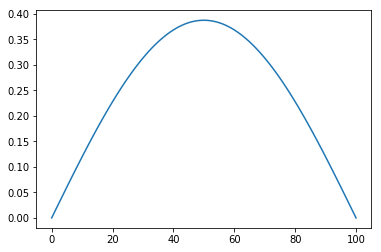

In [31]:
CN(101,5000.)
p.show()

In [29]:
print((pi*pi*KAPPA/L/L/SPH/RHO)**3,3./101)

8.511591481583448e-13 0.0297029702970297
